In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../resources/cleaned_watches_data_fixed.csv")


In [3]:
df


,brand,model,details,price,currency,shipping_cost,movement,case_material,year_of_production,condition,reference_number,scope_of_delivery,location,case_diameter,product_url,dealer_city,dealer_country,country_code
0,Rolex,Datejust 41,126331 41mm Two Tone Chocolate Diamond Dial Ju...,19995.0,$,500,Automatic,Gold/Steel,2024,Like new & unworn,126331,"Original box, original papers","United States of America, New York, Brooklyn",41.0,https://www.chrono24.com/rolex/rolex-datejust-...,Brooklyn,United States of America.,US
1,Rolex,Datejust 36,In Stock 2024 Datejust 36 Blue Index Dial 1262...,8395.0,$,175,Automatic,Steel,2024,Very good,126200,"Original box, original papers","United States of America, Florida, Fort Lauder...",36.0,https://www.chrono24.com/rolex/in-stock-2024-d...,Fort Lauderdale,United States of America.,US
2,Omega,Speedmaster Professional Moonwatch,2025 New Speedmaster Moonwatch,5500.0,$,99,Manual winding,Steel,2025,New,310.30.42.50.01.001,"Original box, original papers","United States of America, Los Angeles",42.0,https://www.chrono24.com/omega/2025-new-speedm...,Los Angeles,United States of America.,US
3,Tudor,Grantour Date,Pre-Owned Grantour Date 20500N White with box ...,2190.0,$,0,Automatic,Steel,2012,Very good,20500N,"Original box, original papers","United States of America, California, San Diego",42.0,https://www.chrono24.com/tudor/tudor-pre-owned...,Tsim Sha Tsui,Hong Kong.,HK
4,Panerai,Submersible,300M Grey Blue Ceramic Bezel Rubber Strap Pam9...,5895.0,$,239,Automatic,Steel,2019,Good,PAM 00959,"Original box, no original papers","United States of America, Wisconsin, Jefferson",42.0,https://www.chrono24.com/panerai/panerai-subme...,Jefferson,United States of America.,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386846,Glashütte Original,Senator Chronometer,1-58-01-05-34-01,24166.0,$,776,Manual winding,White gold,2025,New,1-58-01-05-34-01,"Original box, original papers","Germany, Schwabach",42.0,https://www.chrono24.com/glashuetteoriginal/se...,Schwabach,Germany.,DE
386847,Oris,Aquis Date,01 733 7789 4154-07 8 23 04PEB,2051.0,$,100,Automatic,Steel,2025,New,01 733 7789 4154-07 8 23 04PEB,"Original box, original papers","Germany, Schwabach",43.5,https://www.chrono24.com/oris/aquis-date--id34...,Schwabach,Germany.,DE
386848,Rado,True,Square Automatic,2034.0,$,100,Automatic,Ceramic,2025,New,R27077102,"Original box, original papers","Germany, Schwabach",38.0,https://www.chrono24.com/rado/true-square-auto...,Schwabach,Germany.,DE
386849,Oris,Aquis Date,01 733 7789 4157-07 8 23 04PEB,2084.0,$,100,Automatic,Steel,2025,New,01 733 7789 4157-07 8 23 04PEB,"Original box, original papers","Germany, Schwabach",43.5,https://www.chrono24.com/oris/aquis-date--id35...,Schwabach,Germany.,DE


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386851 entries, 0 to 386850
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brand               386851 non-null  object 
 1   model               386851 non-null  object 
 2   details             385085 non-null  object 
 3   price               386851 non-null  float64
 4   currency            386851 non-null  object 
 5   shipping_cost       386851 non-null  object 
 6   movement            386851 non-null  object 
 7   case_material       386851 non-null  object 
 8   year_of_production  386851 non-null  object 
 9   condition           386851 non-null  object 
 10  reference_number    386808 non-null  object 
 11  scope_of_delivery   386851 non-null  object 
 12  location            386851 non-null  object 
 13  case_diameter       386851 non-null  float64
 14  product_url         386851 non-null  object 
 15  dealer_city         319819 non-nul

In [5]:
print(df["currency"].nunique())


1


In [6]:
from main import prepare_model_features
feature_df = prepare_model_features(df)
feature_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386851 entries, 0 to 386850
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brand               386851 non-null  object 
 1   model               386851 non-null  object 
 2   price               386851 non-null  float64
 3   movement            386851 non-null  object 
 4   case_material       386851 non-null  object 
 5   year_of_production  386851 non-null  object 
 6   condition           386851 non-null  object 
 7   scope_of_delivery   386851 non-null  object 
 8   case_diameter       386851 non-null  float64
 9   country_code        386851 non-null  object 
dtypes: float64(2), object(8)
memory usage: 29.5+ MB


Text(0.5, 0, 'Brand')

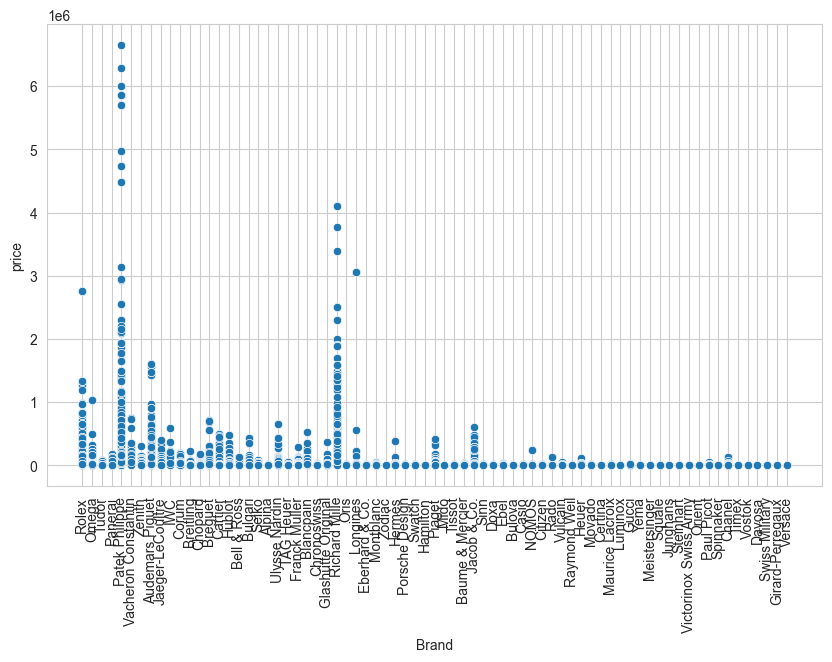

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=feature_df, x="brand", y="price")
plt.xticks(rotation=90)
plt.xlabel("Brand")


Text(0.5, 1.0, 'Price Distribution by Year of Production')

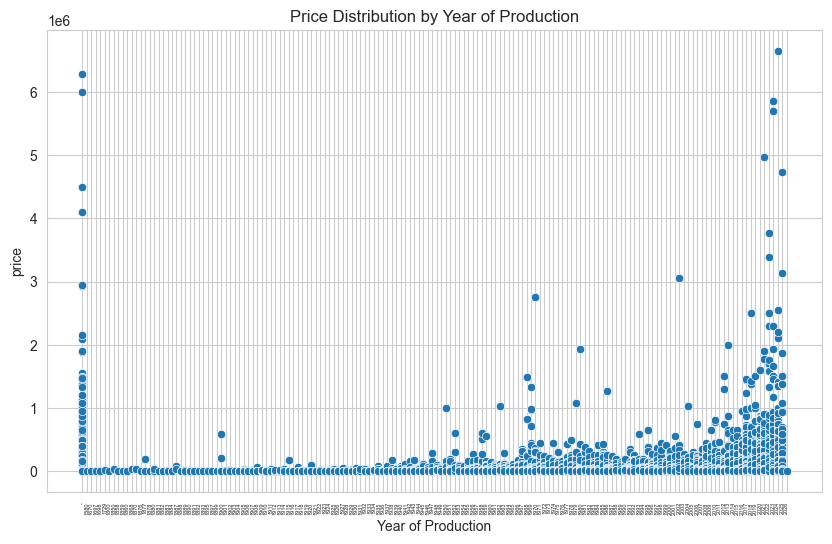

In [8]:
# plot the price distribution according to the year of production, show only the decades
sorted_years_df = feature_df.sort_values("year_of_production", inplace=False)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sorted_years_df, x="year_of_production", y="price")
plt.xticks(rotation=90, fontsize=4)
plt.xlabel("Year of Production")
plt.title("Price Distribution by Year of Production")



In [9]:
feature_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386851 entries, 0 to 386850
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brand               386851 non-null  object 
 1   model               386851 non-null  object 
 2   price               386851 non-null  float64
 3   movement            386851 non-null  object 
 4   case_material       386851 non-null  object 
 5   year_of_production  386851 non-null  object 
 6   condition           386851 non-null  object 
 7   scope_of_delivery   386851 non-null  object 
 8   case_diameter       386851 non-null  float64
 9   country_code        386851 non-null  object 
dtypes: float64(2), object(8)
memory usage: 29.5+ MB


In [10]:
feature_df["year_of_production"].unique()


array(['2024', '2025', '2012', '2019', '1994', '1991', '2022', '1981',
       '-', '1989', '2023', '2013', '2021', '1985', '2018', '1950',
       '2007', '2020', '2017', '2014', '2008', '2011', '2015', '2000',
       '1997', '2016', '1970', '1963', '1980', '1999', '2005', '1996',
       '1990', '2006', '2010', '2002', '2009', '1998', '1995', '2003',
       '1956', '2001', '1967', '1986', '1973', '1988', '1969', '1979',
       '1978', '2004', '1987', '1984', '1961', '1940', '1982', '1955',
       '1974', '1992', '1993', '1966', '1962', '1983', '1947', '1938',
       '1977', '1964', '1972', '1951', '1960', '1959', '1965', '1975',
       '1958', '1968', '1943', '1954', '1976', '1906', '1910', '1891',
       '1952', '1935', '1971', '1945', '1957', '1948', '1939', '1946',
       '1953', '1920', '1937', '1905', '1912', '1900', '1904', '1908',
       '1930', '1913', '1890', '1924', '1944', '1929', '1927', '1914',
       '1925', '1949', '1919', '1915', '1941', '1897', '1942', '1911',
       '1

In [11]:
from main import get_model_df
exmpl_df = get_model_df()
exmpl_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 386836 entries, 0 to 386850
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brand               386836 non-null  object 
 1   model               386836 non-null  object 
 2   price               386836 non-null  float64
 3   movement            386836 non-null  object 
 4   case_material       386836 non-null  object 
 5   year_of_production  386836 non-null  float64
 6   condition           386836 non-null  int64  
 7   scope_of_delivery   386836 non-null  int64  
 8   case_diameter       386836 non-null  float64
 9   country_code        386836 non-null  object 
 10  year_unknown        386836 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 35.4+ MB


In [12]:
exmpl_df["year_of_production"].unique()

array([2024., 2025., 2012., 2019., 1994., 1991., 2022., 1981., 1989.,
       2023., 2013., 2021., 1985., 2018., 1950., 2007., 2020., 2017.,
       2014., 2008., 2011., 2015., 2000., 1997., 2016., 1970., 1963.,
       1980., 1999., 2005., 1996., 1990., 2006., 2010., 2002., 2009.,
       1998., 1995., 2003., 1956., 2001., 1967., 1986., 1973., 1988.,
       1969., 1979., 1978., 2004., 1987., 1984., 1961., 1940., 1982.,
       1955., 1974., 1992., 1993., 1966., 1962., 1983., 1947., 1938.,
       1977., 1964., 1972., 1951., 1960., 1959., 1965., 1975., 1958.,
       1968., 1943., 1954., 1976., 1906., 1910., 1891., 1952., 1935.,
       1971., 1945., 1957., 1948., 1939., 1946., 1953., 1920., 1937.,
       1905., 1912., 1900., 1904., 1908., 1930., 1913., 1890., 1924.,
       1944., 1929., 1927., 1914., 1925., 1949., 1919., 1915., 1941.,
       1897., 1942., 1911., 1928., 1909., 1881., 1934., 2026., 1932.,
       1936., 1922., 1918., 1926., 1889., 1698., 1917., 1729., 1880.,
       1670., 1933.,

In [13]:
print(exmpl_df["price"].describe())


count    3.868360e+05
mean     1.841292e+04
std      4.614756e+04
min      1.300000e+01
25%      2.539000e+03
50%      7.205000e+03
75%      1.682025e+04
max      2.946920e+06
Name: price, dtype: float64


In [14]:
highest_prices = exmpl_df[exmpl_df["price"] > 3000000]
print(highest_prices.shape)

highest_prices


(0, 11)


,brand,model,price,movement,case_material,year_of_production,condition,scope_of_delivery,case_diameter,country_code,year_unknown


In [15]:
# Load dataset
df = get_model_df()

# Identify categorical and numerical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'price']

print(numerical_cols + categorical_cols)


['year_of_production', 'condition', 'scope_of_delivery', 'case_diameter', 'year_unknown', 'brand', 'model', 'movement', 'case_material', 'country_code']


In [16]:
# Define training data
X = df[numerical_cols + categorical_cols]
y = df['price']

for col in df.columns:
    # Print the column type
    print(f"{col}: {df[col].dtype}")
    print(f"{col}: {df[col].nunique()}")
    print("---------------------")


brand: object
brand: 73
---------------------
model: object
model: 2673
---------------------
price: float64
price: 29506
---------------------
movement: object
movement: 6
---------------------
case_material: object
case_material: 24
---------------------
year_of_production: float64
year_of_production: 157
---------------------
condition: int64
condition: 8
---------------------
scope_of_delivery: int64
scope_of_delivery: 4
---------------------
case_diameter: float64
case_diameter: 575
---------------------
country_code: object
country_code: 120
---------------------
year_unknown: int64
year_unknown: 2
---------------------


In [17]:
# Get the number of case materials for each unique material
case_material_counts = df['case_material'].value_counts()
print(case_material_counts)




case_material
Steel                    217396
Rose gold                 30980
-                         30474
Gold/Steel                24108
Yellow gold               21258
White gold                19441
Titanium                  18627
Ceramic                   10836
Platinum                   3141
Plastic                    2433
Carbon                     2054
Bronze                     1740
Red gold                   1563
Gold-plated                 961
Silver                      954
Aluminum                    389
Yellow gold and steel       115
Brass                        77
Tungsten                     73
Tantalum                     58
Sapphire crystal             56
Palladium                    52
White gold and steel         30
Rose gold and steel          20
Name: count, dtype: int64


In [18]:
print(X["condition"].unique())
X["condition"].value_counts()


[1 2 3 4 5 6 7 8]


condition
2    139734
3    110634
1     73050
4     46493
5     11957
6      4884
7        82
8         2
Name: count, dtype: int64

In [19]:
print(X["scope_of_delivery"].unique())
X["scope_of_delivery"].value_counts()


[1 3 4 2]


scope_of_delivery
1    275224
4     71648
3     27725
2     12239
Name: count, dtype: int64

In [20]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 386836 entries, 0 to 386850
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_production  386836 non-null  float64
 1   condition           386836 non-null  int64  
 2   scope_of_delivery   386836 non-null  int64  
 3   case_diameter       386836 non-null  float64
 4   year_unknown        386836 non-null  int64  
 5   brand               386836 non-null  object 
 6   model               386836 non-null  object 
 7   movement            386836 non-null  object 
 8   case_material       386836 non-null  object 
 9   country_code        386836 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.5+ MB
